In [1]:
import pandas as pd
from DB.database import DataBase
from DB.korDB_manager import KoreaDB_manager
import os

db = DataBase(
    host=os.environ.get('MYSQL_HOST'),
    db_name='KOR_DB',
    pwd=os.environ.get('MYSQL_ROOT_PASSWORD'),
    user=os.environ.get('MYSQL_USER'),
)

manager = KoreaDB_manager(
    host=os.environ.get('MYSQL_HOST'),
    db_name='KOR_DB',
    pwd=os.environ.get('MYSQL_ROOT_PASSWORD'),
    user=os.environ.get('MYSQL_USER'),
)


In [2]:
data = db.getDailyPrice('005930', '2018-01-01', '2018-12-31')
data

,open,high,low,close,diff,volume,name,adj_close,market,amount,stock_num,cap
date,,,,,,,,,,,,
2018-01-02,2569000,2570000,2539000,2551000,3000,169485,None,None,None,None,None,None
2018-01-03,2627000,2628000,2571000,2581000,30000,200270,None,None,None,None,None,None
2018-01-04,2606000,2609000,2532000,2554000,27000,233909,None,None,None,None,None,None
2018-01-05,2565000,2606000,2560000,2606000,52000,189623,None,None,None,None,None,None
2018-01-08,2620000,2626000,2575000,2601000,5000,167673,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,38200,38650,38100,38650,0,14947080,None,None,None,None,None,None
2018-12-24,38500,39050,38300,38800,150,9729530,None,None,None,None,None,None
2018-12-26,38400,38750,38300,38350,450,12707675,None,None,None,None,None,None


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True
import mplfinance as mpf
import datetime as dt


In [ ]:
def calculate_adjusted_prices(df: DataFrame, column: str, split_coefficient: str, dividend: str):
    """
    Refer to https://joshschertz.com/2016/08/27/Vectorizing-Adjusted-Close-with-Python/
    Vectorized approach for calculating the adjusted prices for the
    specified column in the provided DataFrame. This creates a new column
    called 'adj_<column name>' with the adjusted prices. This function requires
    that the DataFrame have columns with dividend and split_ratio values.

    :param df: DataFrame with raw prices along with dividend and split_ratio
        values
    :param column: String of which price column should have adjusted prices
        created for it
    :param split_coefficient: String of split coefficient column.
        e.g. split_coefficient=7 means that 1 stock is split into 7 stocks.
    :param dividend: String of dividend column
    :return: DataFrame with the addition of the adjusted price column
    """
    adj_column = 'adj_' + column

    # Remove redundant column
    if adj_column in df.columns:
        del df[adj_column]

    # Reverse the DataFrame order, sorting by date in descending order
    df.sort_index(ascending=False, inplace=True)

    # # Extract values
    # price_col = df[column].values
    # split_col = df[split_coefficient].values
    # dividend_col = df[dividend].values
    # adj_price_col = np.zeros(len(df.index))
    # adj_price_col[0] = price_col[0]

    # # Calculate adjusted prices
    # for i in range(1, len(price_col)):
    #     adj_price_col[i] = \
    #         round(
    #             number=(adj_price_col[i - 1] + adj_price_col[i - 1] * (((price_col[i] / split_col[i - 1]) - price_col[i - 1] - dividend_col[i - 1]) / price_col[i - 1])),
    #             ndigits=4
    #         )

    # df[adj_column] = adj_price_col

    # # Change the DataFrame order back to dates ascending
    # df.sort_index(ascending=True, inplace=True)

    # return df

In [82]:
def getPivotTable(code_list, start_date, end_date):
    result = None
    for code in code_list:
        data = db.getDailyPrice(code, start_date=START, end_date=END)
        data = data[['close']]
        data = data.rename(columns = {'close': code})
        
        if result is None:
            result = data
        else:
            result = pd.concat([result, data],axis=1)
    
    return result


START = '2000-01-13'
END = '2010-01-23'
code_list = ["005940", "005930", "002020"]
# code_list = ["005940"]

data = getPivotTable(code_list, START, END)


data

,005940,005930,002020
date,,,
2000-01-13,25000,285500,8560
2000-01-14,24000,291500,8700
2000-01-17,24500,305000,8890
2000-01-18,23500,305000,8600
2000-01-19,22000,298000,7310
2000-01-20,22250,302000,7310
2000-01-21,21850,294000,7500
2000-01-24,21000,285000,8000
2000-01-25,21000,272000,8000


/opt/dev/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='date'>

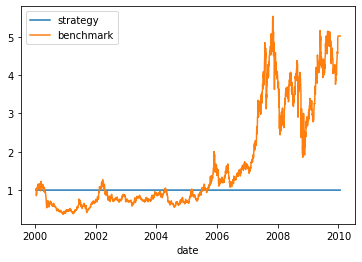

In [83]:
def backtest_strategy(data , symbol_trade, symbol_volatility, volatility_threshold, capital, symbol_benchmark):
    df_init = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    df_update = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    df_end = (data[symbol_trade]*0).to_frame().assign(cash = 0)
    
    df_init.iloc[0, df_init.columns.get_loc('cash')] = capital
    df_end.iloc[0, df_init.columns.get_loc('cash')] = capital

    calender = pd.Series(data.index).iloc[1:]

    for date in calender:
        prev_date = df_init.index[df_init.index < date][-1]

        df_init.loc[date, :] = df_end.loc[prev_date, :]
        port_value = df_init.loc[date, symbol_trade] * data.loc[date, symbol_trade] + df_init.loc[date, 'cash']

        # print(int(data.loc[date, symbol_volatility]), volatility_threshold)

        
        if int(data.loc[date, symbol_volatility]) > int(volatility_threshold) : 
            """ volatility is high -> be fully in cash """
            # print('volatility is high')
            df_end.loc[date, symbol_trade] = 0
            df_end.loc[date, 'cash'] = port_value
        else:
            """ volatility is low -> be in market position """
            # print('volatility is low')

            df_end.loc[date, symbol_trade] = port_value / data.loc[date, symbol_trade]
            df_end.loc[date,'cash'] = 0
        
        df_update.loc[date] = df_end.loc[date] - df_init.loc[date]

    portval = (df_end * data.assign(cash = 1)[[symbol_trade, 'cash']]).sum(axis = 1).to_frame().rename(columns = {0:'strategy'})
    portval['benchmark'] = data[symbol_benchmark]
    portval = portval / portval.iloc[0].values

    return portval

report = backtest_strategy(data, symbol_trade='005940', symbol_volatility='005930', volatility_threshold= 85000, capital= 1000000, symbol_benchmark= '002020')

report.plot()

In [26]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm
import pandas

In [ ]:
print(db)

In [29]:
START = '2021-01-13'
END = '2022-01-23'
company = "005930"
data = db.getDailyPrice(company, start_date=START, end_date=END)


In [30]:
print(data.index)

DatetimeIndex(['2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26',
               ...
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns, UTC]', name='date', length=256, freq=None)


In [ ]:
plt.plot(data.index, data['close'])


In [ ]:
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return


def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20:
        order_target(context.sym, 1)
    else:
        order_target(context.sym, -1)
    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20)

        


In [31]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

TypeError: __init__() missing 1 required positional argument: 'sim_params'

UnknownBundle: No bundle registered with the name 'alpaca_api'